In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("Output/HO_Gauss_RU_Grid.txt", delim_whitespace = True, skiprows = 8, skipfooter = 1, engine="python")

alpha = df["Param_1"]
E = df["E"]

In [18]:
#display(df)

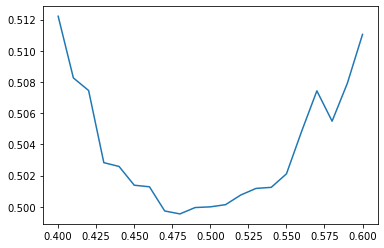

In [16]:
plt.plot(alpha, E)
plt.show()

In [19]:
df = pd.read_csv("Output/HO_Gauss_RU_GD.txt", delim_whitespace = True, skiprows = 8, skipfooter = 1, engine="python")

alpha = df["Param_1"]
E = df["E"]

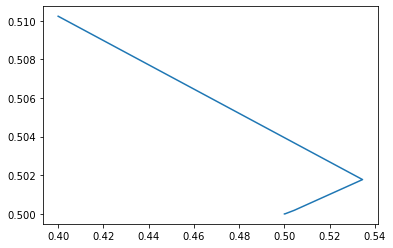

In [20]:
plt.plot(alpha, E)
plt.show()

In [1]:
def block(x):
    # preliminaries
    n = len(x)
    d = int(np.log2(n))
    s, gamma = np.zeros(d), np.zeros(d)
    mu = np.mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in np.arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = n**(-1) * sum( (x[0:(n - 1)] - mu) * (x[1:n] - mu) )
        # estimate variance of x
        s[i] = np.var(x)
        # perform blocking transformation
        x = 0.5*(x[0::2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = ( np.cumsum( ((gamma / s)**2 * 2**np.arange(1, d+1)[::-1])[::-1] ) )[::-1]

    # we need a list of magic numbers
    q = np.array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914,
                  31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in np.arange(0, d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k] / 2**(d - k)


x = np.array([1,2,3,46])
(mean, var) = block(x) 
std = np.sqrt(var)

data = {'Mean':[mean], 'STDev':[std]}
frame = pd.DataFrame(data, index = ['Values'])
display(frame)

NameError: name 'np' is not defined